# W02D04 - APIs and Other Data Types

**Notebook By: Usama Salim**

*Contribution: Simon Dawkins*


In today's lecture, we will be looking at using APIs and other ways data can be formatted (HTML, JSON, XML).


## Outline


1.   Python Review/Exercises
2.   What is HTML/XML/JSON
3.   Webscraping Demo
4.   Using an API
5.   Setting Environment Variables



### **Python Review**

This week you've been exposed to Python to handle and manipulate data. Let's do some basic exercises: We are going to access a specific element(s) in a data container, and manipulate them.



### Exercise 1: Accessing Data in a List. Print the dog element from the list based on its index, then print out all the animals in the list.

In [2]:
items = ['cat', 'dog', 'fish', 'bird', 1, 2, 3, 4]
print(items[1])
print(items[0:4])



dog
['cat', 'dog', 'fish', 'bird']


In [ ]:
#@title Solution



print(items[1])
print(items[:4])


### Exercise 2: Print out the numbers in the list using a loop

In [5]:
i = 4
while i < len(items):
  print(items[i])
  i += 1

1
2
3
4


In [ ]:
#@title Solution
print([x for x in items if type(x) == int])

### Exercise 3: Let's pull out animals from this dictionary

In [7]:
new_items = {'animals': items[:4], 'numbers': items[4:]}
new_items

{'animals': ['cat', 'dog', 'fish', 'bird'], 'numbers': [1, 2, 3, 4]}

In [8]:
new_items['animals']

['cat', 'dog', 'fish', 'bird']

In [ ]:
#@title Solution
new_items['animals']


### Exercise 4: Let's create a list of dictionaries and grab only the animals

In [9]:
animals = '''
Canidae
Felidae
Cat
Cattle
Dog
Donkey
Goat
Guinea pig
Horse
Pig
Rabbit
Fancy rat varieties
laboratory rat strains
Sheep breeds
Water buffalo breeds
Chicken breeds
Duck breeds
Goose breeds
Pigeon breeds
Turkey breeds
Aardvark
Aardwolf
African buffalo
African elephant
African leopard
'''
all_animals = animals.split('\n')[1:-1]
list_of_dicts = []
for i in range(5):
  new_dict = {"numbers": [i+1, i+2, i+3], "animals": all_animals[i*5:5*(i+1)]}
  list_of_dicts.append(new_dict)

In [10]:
list_of_dicts

[{'numbers': [1, 2, 3],
  'animals': ['Canidae', 'Felidae', 'Cat', 'Cattle', 'Dog']},
 {'numbers': [2, 3, 4],
  'animals': ['Donkey', 'Goat', 'Guinea pig', 'Horse', 'Pig']},
 {'numbers': [3, 4, 5],
  'animals': ['Rabbit',
   'Fancy rat varieties',
   'laboratory rat strains',
   'Sheep breeds',
   'Water buffalo breeds']},
 {'numbers': [4, 5, 6],
  'animals': ['Chicken breeds',
   'Duck breeds',
   'Goose breeds',
   'Pigeon breeds',
   'Turkey breeds']},
 {'numbers': [5, 6, 7],
  'animals': ['Aardvark',
   'Aardwolf',
   'African buffalo',
   'African elephant',
   'African leopard']}]

In [11]:
for dic in list_of_dicts:
  print(dic['animals'])

['Canidae', 'Felidae', 'Cat', 'Cattle', 'Dog']
['Donkey', 'Goat', 'Guinea pig', 'Horse', 'Pig']
['Rabbit', 'Fancy rat varieties', 'laboratory rat strains', 'Sheep breeds', 'Water buffalo breeds']
['Chicken breeds', 'Duck breeds', 'Goose breeds', 'Pigeon breeds', 'Turkey breeds']
['Aardvark', 'Aardwolf', 'African buffalo', 'African elephant', 'African leopard']


In [12]:
#@title Solution
animals = [entry['animals'] for entry in list_of_dicts]
def flatten(l):
    return [item for sublist in l for item in sublist]

flatten(animals)

['Canidae',
 'Felidae',
 'Cat',
 'Cattle',
 'Dog',
 'Donkey',
 'Goat',
 'Guinea pig',
 'Horse',
 'Pig',
 'Rabbit',
 'Fancy rat varieties',
 'laboratory rat strains',
 'Sheep breeds',
 'Water buffalo breeds',
 'Chicken breeds',
 'Duck breeds',
 'Goose breeds',
 'Pigeon breeds',
 'Turkey breeds',
 'Aardvark',
 'Aardwolf',
 'African buffalo',
 'African elephant',
 'African leopard']

## What is HTML/XML/JSON?

These are all ways of storing information. And all three use a tree structure to organize the formatting of their data. 

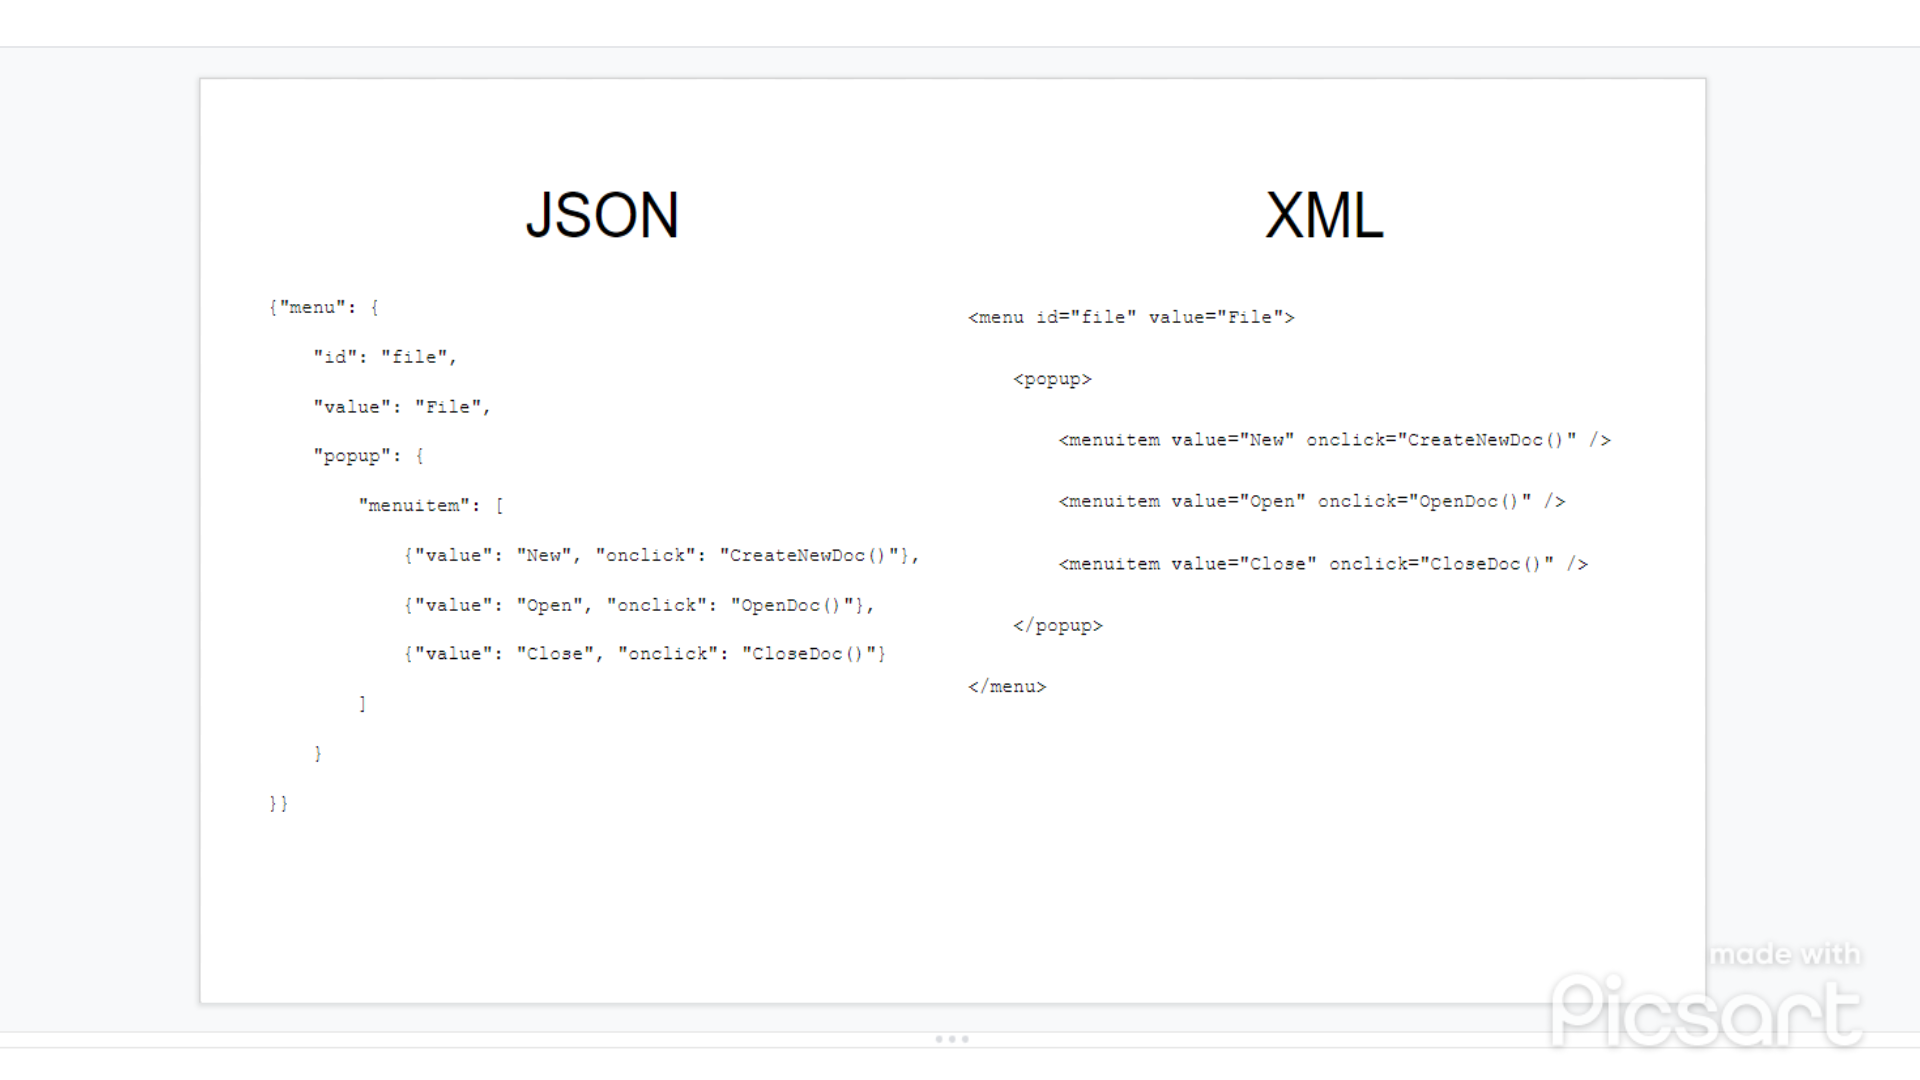



Here, we have a hierarchical collection of elements. In both cases, we have "menu" as the **Root Node**. Branching off from the root node, we have **id**, **value**, and **popup** as the children of the root node. 

## JSON
- Consider this a dictionary of dictionaries
- Keys are the parents and the values are the children.


## XML/HTML
- element consists of **start tag**, **content** and **end tag**, and **attributes**
- tags have names and are delimited with `<` and `>`; end tag with `</ >`
- attributes added after the tag name within `<` and `>`

For example: `<country name="Canada">` content content `</country>`
- `country` is the tag
- `name="Canada"` is an attribute

**HTML is just XML for webpages.** 

Let's see a HTML example

Let's take a look at an example: https://en.wikipedia.org/wiki/The_Office_(American_TV_series)

Use inspect page to see HTML
Explain header, body, tags etc.

# Web Scraping

Given that we know the structure of how information is organized we could use python to extract information. Below is a demo of how we could scrape info off the Wikipedia page for The Office. Link Given Above.

In [ ]:
#Dependencies
from bs4 import BeautifulSoup as bs
import requests

#Getting Html content
r = requests.get("https://en.wikipedia.org/wiki/The_Office_(American_TV_series)")
soup = bs(r.content)
content = soup.prettify()

In [ ]:
info_box = soup.find(class_='infobox vevent')

In [ ]:
def get_content_value(row_data):
  if row.find("li") is not None:
    return [li.get_text(" ", strip = True).replace("\xa0", ' ') for li in row.find_all('li')]
  else:
    return row.find('td').get_text(" ", strip = True).replace("\xa0", ' ')

In [ ]:
show_info={}
X = info_box.find_all('tr')
for index, row in enumerate(X):
  if index==0:
    show_info['Title']=row.find('th').get_text()
  elif index == 1:
    continue
  else:
    x = row.find('th')
    y = row.find('td')
    if x is not None and y is not None:
      key = row.find('th').get_text()
      value = get_content_value(row.find('td'))
      show_info[key] = value

for key in show_info:
  print (f"{key}:{show_info[key]}")

## Cons of Web Scraping

- High Effort
- Almost all information is irrelevant (eg UI-related)
- Websites often require interaction (eg “Load More” button or scrolling down)
- When websites update, your code will break
- Every website is different
- Companies actively try to stop data miners


## Tools:
- Beautiful Soup 
- Selenium
- Requests
- Newspaper3k (for articles)



# Using An API

A better way to grab information from sites is by using an **Application Programming Interface** or API for short.

- Programmer-friendly version of websites (and applications)
- Send a request to a URL composed of:
    - API root (https://api.translink.ca/rttiapi/v1/)
    - API endpoint (stops)
    - API key (credentials) (apikey=YOURKEY)
    - Parameter keys (lat= , long= )
    - Parameter values (49.18, -122.85)

Full URL:

https://api.translink.ca/rttiapi/v1/stops?apikey=YOURKEY&lat=49.18&long=-122.85


Returns data (JSON, XML, csv, etc.)

{

        "StopNo": 54997,
        "Name": "SB KING GEORGE BLVD FS 98 AVE",
        "BayNo": "N",
        "City": "SURREY",
        "OnStreet": "KING GEORGE BLVD",
        "AtStreet": "98 AVE",
        "Latitude": 49.179601,
        "Longitude": -122.845814,
        "WheelchairAccess": 1,
        "Distance": 307,
        "Routes": "314, 321, 329"
        
    }


# Examples of APIs

- Translink API: https://developer.translink.ca/
- GitHub API: https://developer.github.com/v3/
- Weather API: https://openweathermap.org/api
- Stock price API (Alpha Vantage): https://www.alphavantage.co/
- Spotify API https://developer.spotify.com/documentation/web-api/


## Many, many others!


# HTTP Requests

When you access a website (through an URL), you are:
- Sending a HTTP GET request to the server to retrieve data
- "data" can be a webpage that is displayed, it can be JSON, etc.
- GET is not the only request type (e.g. POST for sending information)
- Status codes are helpful when you're working with HTTP requests 
  - 200 OK
  - 300 Multiple Choices
  - 400 Bad Request
  - 401 Unauthorized
  - 404 Not Found




# API Demo


In [13]:
import requests
from bs4 import BeautifulSoup

# this for DEMO PURPOSES ONLY - please use env vars IRL.
apikey = 'E6gTZGGHk701BmzJx63y'

**Documentation:**

https://www.translink.ca/about-us/doing-business-with-translink/app-developer-resources/rtti

### Simple Example

In [14]:
URL = 'http://api.translink.ca/rttiapi/v1/status' + '?apikey=' + apikey
response = requests.get(URL)
response.text

'<Statuses xmlns:i="http://www.w3.org/2001/XMLSchema-instance"><Status><Name>Schedule</Name><Value>Online</Value></Status><Status><Name>Location</Name><Value>Online</Value></Status></Statuses>'

### Parsing XML

In [ ]:
# Example 1: get information about a specific bus stop

request_url = 'http://api.translink.ca/rttiapi/v1/stops/61935?apikey=' + apikey

response = requests.get(request_url)
response.text

In [ ]:
soup = BeautifulSoup(response.text, 'lxml')
soup

In [ ]:
# extract the stop number
soup.find('stopno')

In [ ]:
# extract the city
soup.find('city')

### Parsing JSON

In [ ]:
# Example 2: get estimates of bus schedules at a specific stop

request_url = 'http://api.translink.ca/rttiapi/v1/stops/' + '61935' + '/estimates?apikey=' + apikey
response = requests.get(request_url, headers={'accept': 'application/JSON'})

response

In [ ]:
response.text

In [ ]:
res_json = response.json()
res_json

In [ ]:
for schedule in res_json[0]['Schedules']:
    print('Leaving at ' + schedule['ExpectedLeaveTime'])

In [ ]:
# Example 3: get all bus stops near a (latitude, longitude) coordinate (more parameters)

request_url = 'https://api.translink.ca/rttiapi/v1/stops?apikey=' + apikey + '&lat=' + '49.18' + '&long=' + '-122.85' + '&radius=1000'
response = requests.get(request_url, headers={'accept': 'application/JSON'})
response.json()

## Using the requests.get() params parameter

In [ ]:
URL = 'https://api.translink.ca/rttiapi/v1/stops'
    
params_dict = { 
             'lat' : '49.18',
             'long' : '-122.85',
             'radius' : '1000',
             'apikey' : apikey
              }
headers_dict = {'accept': 'application/JSON'}
response = requests.get(URL, params=params_dict, headers=headers_dict)
res_json = response.json()
res_json

In [ ]:
for stop in res_json:
    print(stop['WheelchairAccess'])

In [ ]:
wheelchair_access = {}
for stop in res_json:
    access = stop['WheelchairAccess']
    name = stop['Name']
    if access == 1:
        wheelchair_access[name] = 'Yes'
    else:
        wheelchair_access[name] = 'No'
        
wheelchair_access

## Now with XML

In [ ]:
URL = 'https://api.translink.ca/rttiapi/v1/stops'
    
params_dict = { 
             'lat' : '49.18',
             'long' : '-122.85',
             'radius' : '600',
             'apikey' : apikey
              }
response = requests.get(URL, params=params_dict)
response.text

In [ ]:
soup = BeautifulSoup(response.text, 'lxml')
soup

In [ ]:
stops = soup.find_all('stop')
stops

In [ ]:
for stop in stops:
    print(stop.find('wheelchairaccess'))

In [ ]:
wheelchair_access = {}

for stop in stops:
    access = stop.find('wheelchairaccess')
    name = stop.find('name')
    if access == 1:
        wheelchair_access[name] = 'Yes'
    else:
        wheelchair_access[name] = 'No'
        
wheelchair_access

# Setting Environment Variables

It is best practice to set your API key as an environment variable

- export TRANSLINK_API=YOURAPIKEY
- echo $TRANSLINK_API (should print out your API key)

**Note:** not permanent, have to redo this every time you close the command line! (Google how to “set environment variable permanently” for your operating system.

# Regarding final projects...

Some data science problems (e.g. stock prediction, twitter sentiment, etc.) will require data from APIs, but the APIs might not let you query dates in the past!
If you know you want to work with data that has a temporal component for your final project:
- Look for an API early
- Check if it lets you query past dates
- If not, write a python program that queries the API on the current date and run it every day (or automate it!)
